<a href="https://colab.research.google.com/github/MammadovN/Machine_Learning/blob/main/projects/01_supervised/classification/image_classification/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time

# Model Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


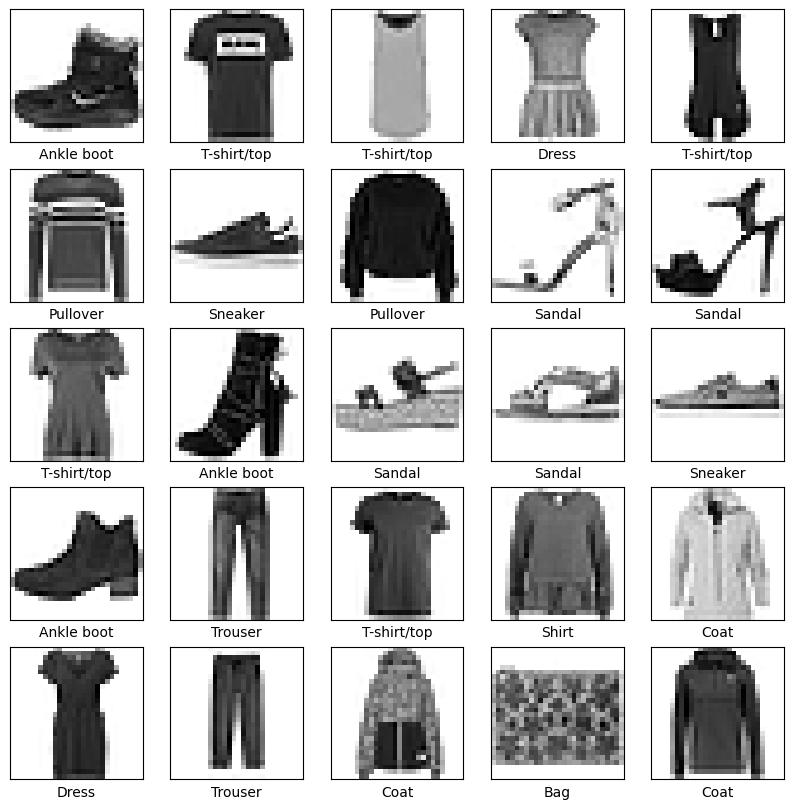

In [5]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Visualize sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

print(f"Original features: {X_train_flat.shape[1]}")
print(f"Reduced features after PCA: {X_train_pca.shape[1]}")

Original features: 784
Reduced features after PCA: 187


In [7]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "LightGBM": LGBMClassifier(num_leaves=31, learning_rate=0.1, n_estimators=100, random_state=42),
    "ANN": Sequential([
        Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
}

# Compile ANN
models["ANN"].compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
results = []

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    start_time = time.time()

    if name == "ANN":
        history = model.fit(X_train_pca, y_train,
                          epochs=20,
                          batch_size=64,
                          validation_data=(X_test_pca, y_test),
                          verbose=0)
        train_time = time.time() - start_time
        y_pred = np.argmax(model.predict(X_test_pca), axis=1)
    else:
        model.fit(X_train_pca, y_train)
        train_time = time.time() - start_time
        y_pred = model.predict(X_test_pca)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Training Time (s)": train_time,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score'],
        "Confusion Matrix": cm
    })

    print(f"{name} training completed in {train_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, target_names=class_names))


Training KNN...
KNN training completed in 0.02 seconds
Accuracy: 0.8623
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.85      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.73      0.80      0.76      1000
       Dress       0.90      0.88      0.89      1000
        Coat       0.78      0.77      0.77      1000
      Sandal       0.99      0.88      0.93      1000
       Shirt       0.67      0.59      0.63      1000
     Sneaker       0.91      0.96      0.93      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.92      0.97      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training Decision Tree...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Decision Tree training completed in 13.16 seconds
Accuracy: 0.6131
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.65      0.70      1000
     Trouser       0.98      0.88      0.93      1000
    Pullover       0.35      0.84      0.49      1000
       Dress       0.82      0.64      0.72      1000
        Coat       0.00      0.00      0.00      1000
      Sandal       0.74      0.74      0.74      1000
       Shirt       0.23      0.02      0.04      1000
     Sneaker       0.84      0.69      0.76      1000
         Bag       0.38      0.84      0.52      1000
  Ankle boot       0.88      0.84      0.86      1000

    accuracy                           0.61     10000
   macro avg       0.60      0.61      0.58     10000
weighted avg       0.60      0.61      0.58     10000


Training Random Forest...
Random Forest training completed in 58.67 seconds
Accuracy: 0.7598
              precision    recall  f1-score   support

 T-shirt/top       0.67  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.147276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47685
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 187
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM training completed in 87.31 seconds
Accuracy: 0.8709
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.85      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.76      0.79      0.77      1000
       Dress       0.88      0.89      0.89      1000
        Coat       0.79      0.80      0.79      1000
      Sandal       0.95      0.95      0.95      1000
       Shirt       0.68      0.61      0.64      1000
     Sneaker       0.93      0.94      0.94      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


Training ANN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ANN training completed in 62.74 seconds
Accuracy: 0.8918
              precision    recall  f1-score   support

 T-shirt/


Model Performance Comparison:
               Model  Accuracy  Precision  Recall  F1-Score  Training Time (s)
5                ANN    0.8918   0.891554  0.8918  0.891452          62.735868
4           LightGBM    0.8709   0.870205  0.8709  0.870290          87.312712
0                KNN    0.8623   0.863117  0.8623  0.861593           0.022185
3  Gradient Boosting    0.8361   0.834688  0.8361  0.835109        7174.599664
2      Random Forest    0.7598   0.753861  0.7598  0.752371          58.667547
1      Decision Tree    0.6131   0.598179  0.6131  0.575687          13.160118


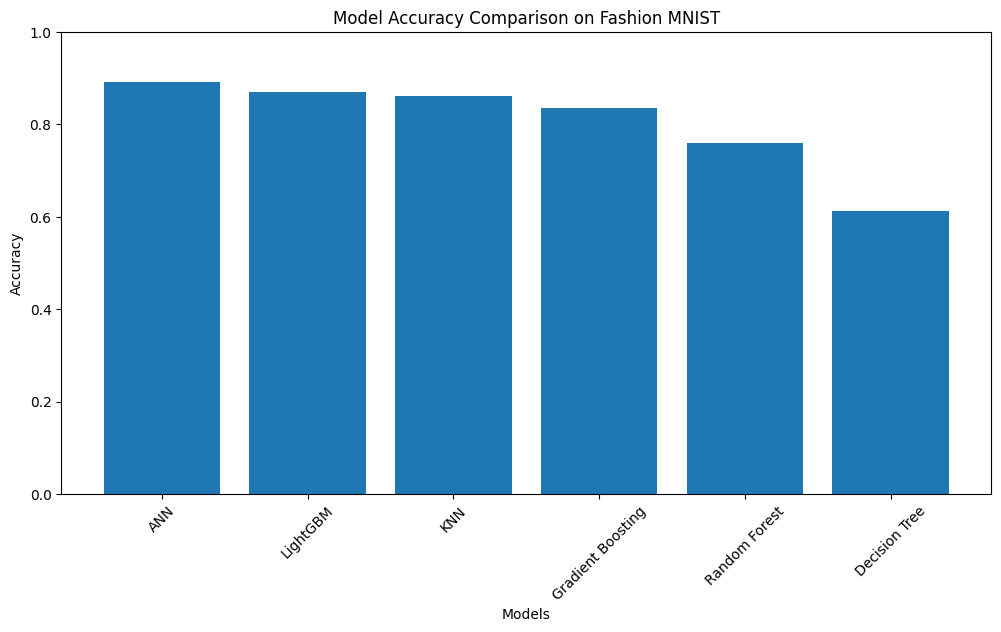

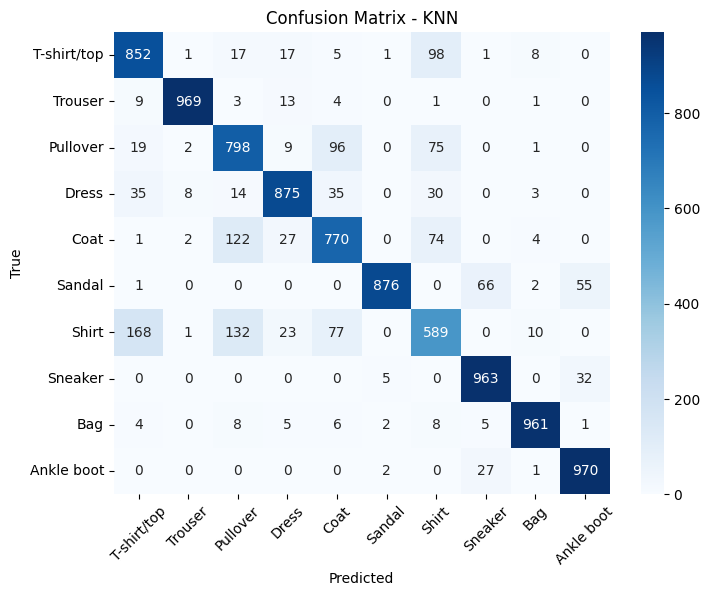

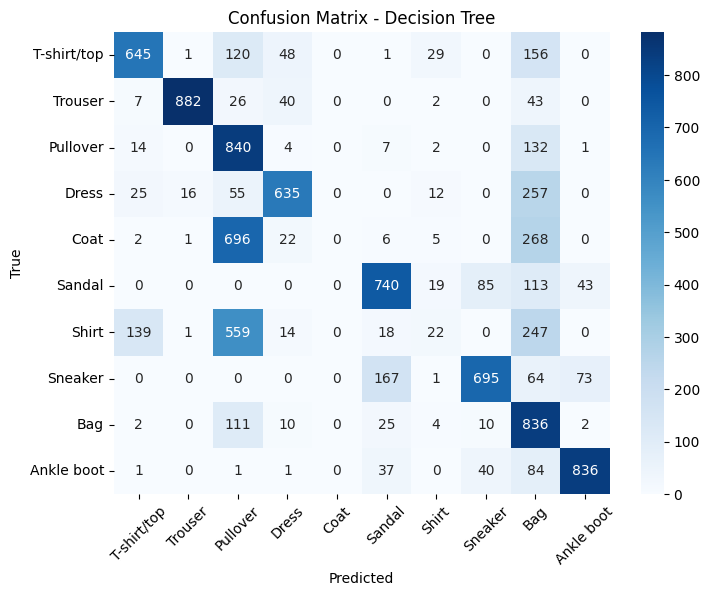

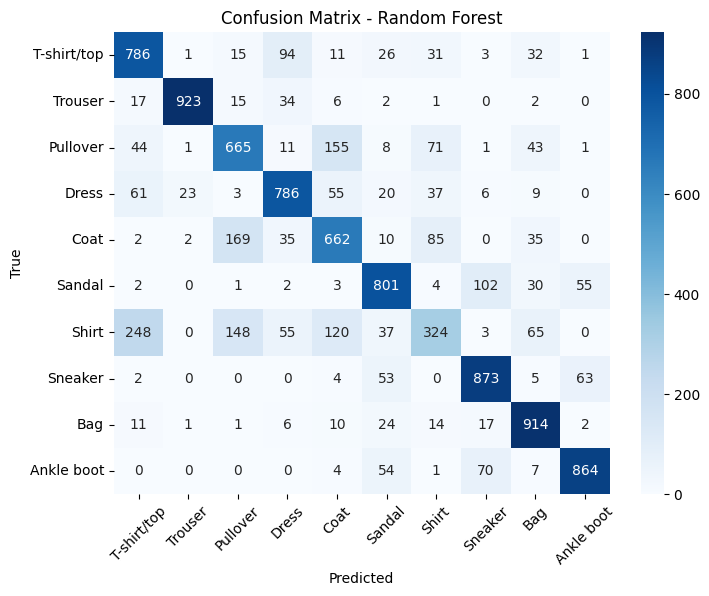

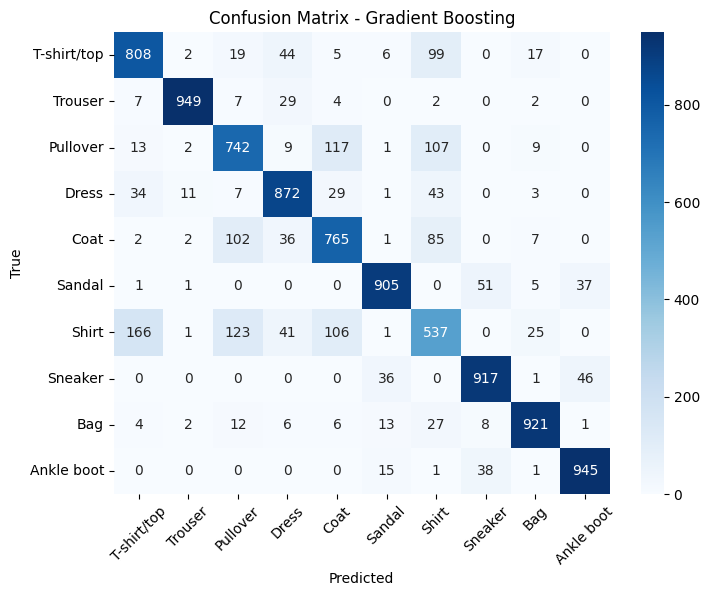

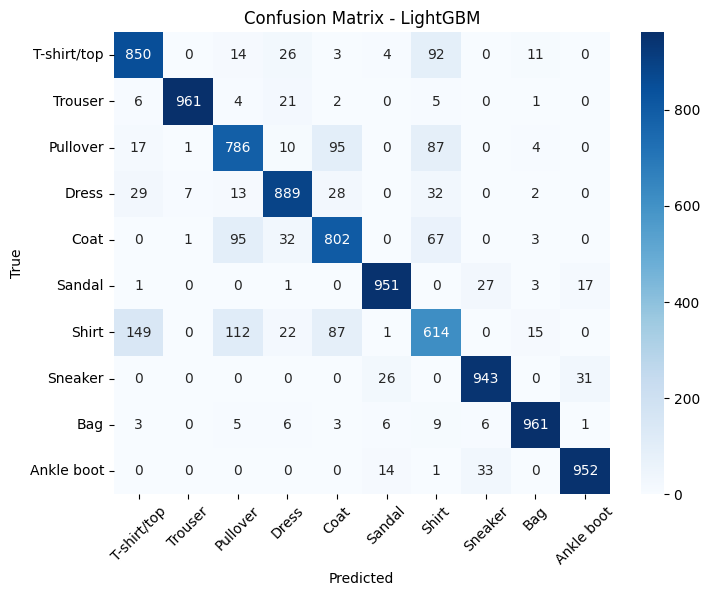

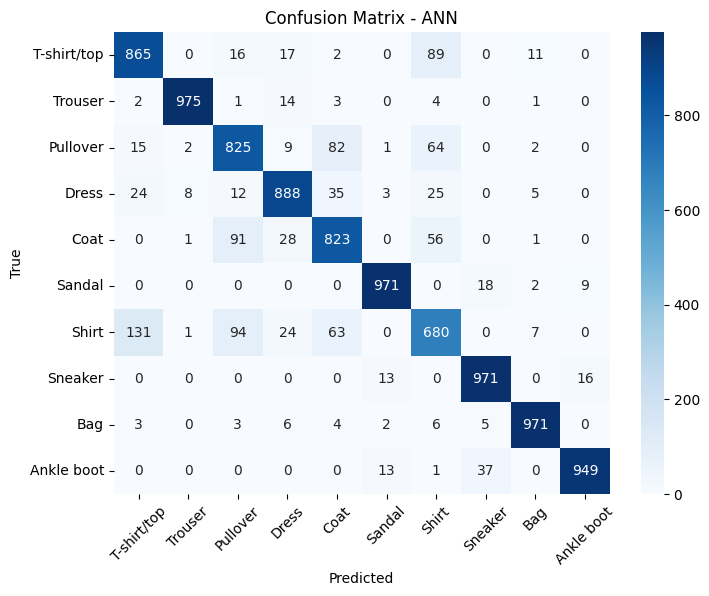

In [9]:
results_df = pd.DataFrame(results).sort_values("Accuracy", ascending=False)
print("\nModel Performance Comparison:")
print(results_df[["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Training Time (s)"]])

# Plot accuracy comparison
plt.figure(figsize=(12, 6))
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.title("Model Accuracy Comparison on Fashion MNIST")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

## Confusion Matrix Visualization
for result in results:
    plt.figure(figsize=(8, 6))
    sns.heatmap(result["Confusion Matrix"], annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(f'Confusion Matrix - {result["Model"]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

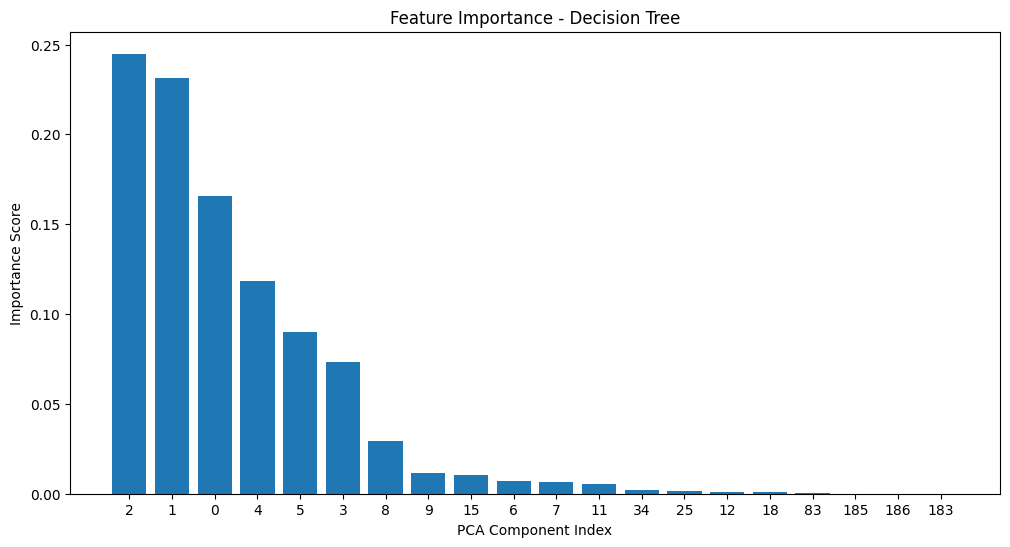

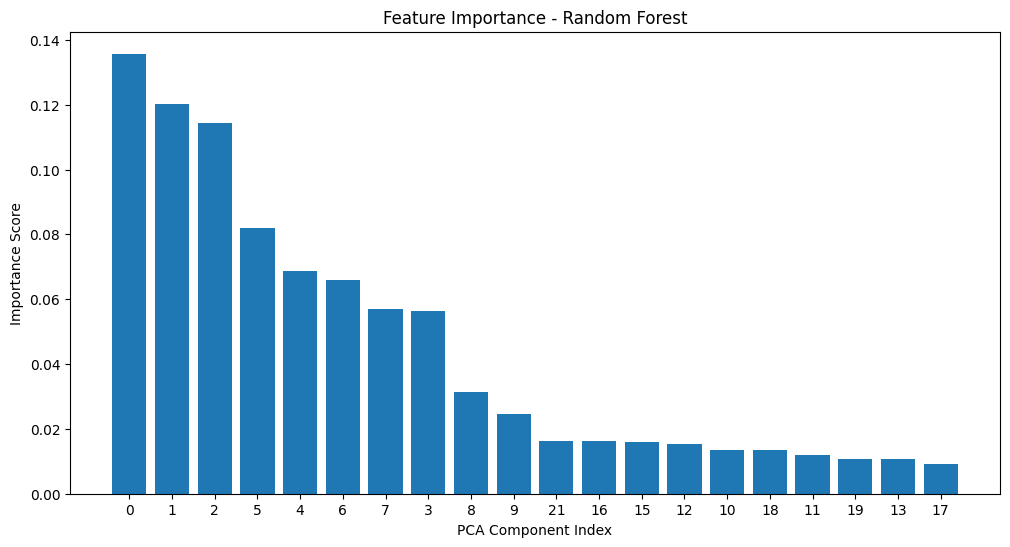

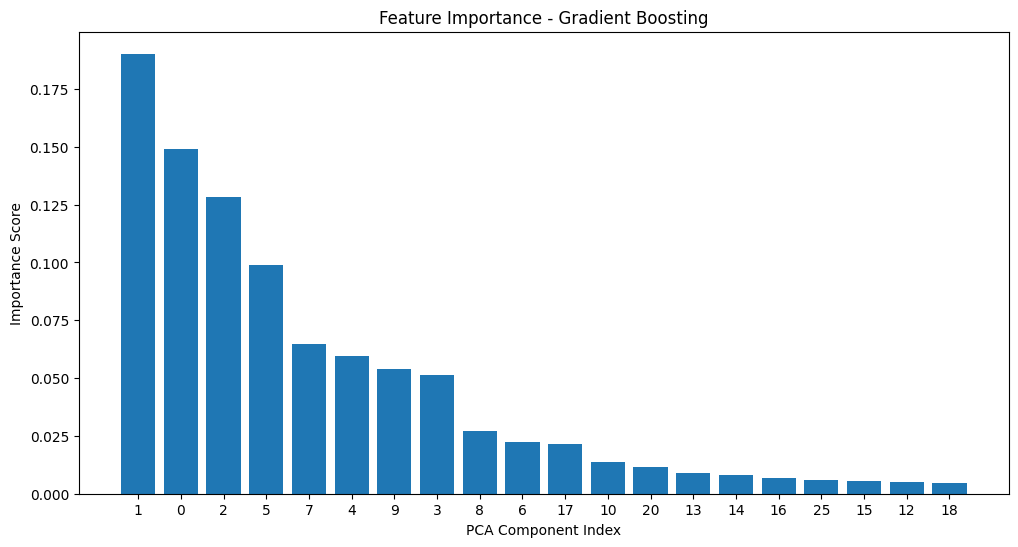

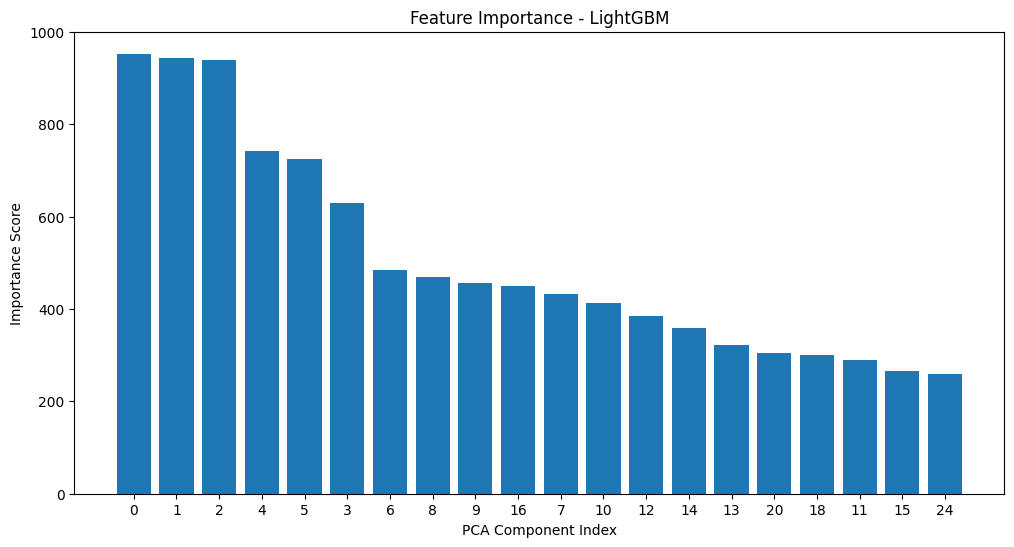

In [10]:
for name, model in models.items():
    if name in ["Decision Tree", "Random Forest", "Gradient Boosting", "LightGBM"]:
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1][:20]  # Top 20 features

            plt.figure(figsize=(12, 6))
            plt.title(f"Feature Importance - {name}")
            plt.bar(range(len(indices)), importances[indices], align='center')
            plt.xticks(range(len(indices)), indices)
            plt.xlabel("PCA Component Index")
            plt.ylabel("Importance Score")
            plt.show()

In [11]:
results_df.to_csv("fashion_mnist_results.csv", index=False)

# Save models
import joblib
for name, model in models.items():
    if name != "ANN":
        joblib.dump(model, f"{name.lower().replace(' ', '_')}_fashion_mnist.joblib")
    else:
        model.save("ann_fashion_mnist.h5")

print("\nAll models trained and evaluated successfully!")


All models trained and evaluated successfully!
